#Lista 02 questão 01

Considere o conjunto de dados disponível em breastcancer.csv, organizado
em 31 colunas, sendo as 30 primeiras colunas os atributos e a última coluna a
saída. Os 30 atributos coletados de exames médicos são usados no diagnóstico
do câncer de mama, sendo 1 a classe positiva e 0 a classe negativa. Maiores
detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/
stable/datasets/toy_dataset.html#breast-cancer-dataset.

preparação dos dados

In [35]:
from google.colab import drive

drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [36]:
link = '/content/mydrive/MyDrive/UFC_mestrado/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_02_ama/breastcancer.csv'

In [37]:
# Tratamento de dados
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Tratamento de dados para separar treino, teste e normalização
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold


sns.set_palette("Accent")
sns.set_style("darkgrid")


In [38]:
df = pd.read_csv(link, header=None)

In [39]:
df.shape

(569, 31)

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


#Normalizando os dados
##Separando para dados de treino e dados de testes.

In [41]:

# passando os valore de x
# Selecionando todas as colunas exceto a última
X = df.iloc[:,:-1]

# passando os valore de y
# Pegando somente a última coluna
y = df.iloc[:, -1]

In [42]:
# X = np.hstack((np.ones((X.shape[0], 1)), X))

In [43]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: 30
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [45]:
X.iloc[:,-1]

0      0.11890
1      0.08902
2      0.08758
3      0.17300
4      0.07678
        ...   
564    0.07115
565    0.06637
566    0.07820
567    0.12400
568    0.07039
Name: 29, Length: 569, dtype: float64

<ipython-input-46-45feb41bc324>:19: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



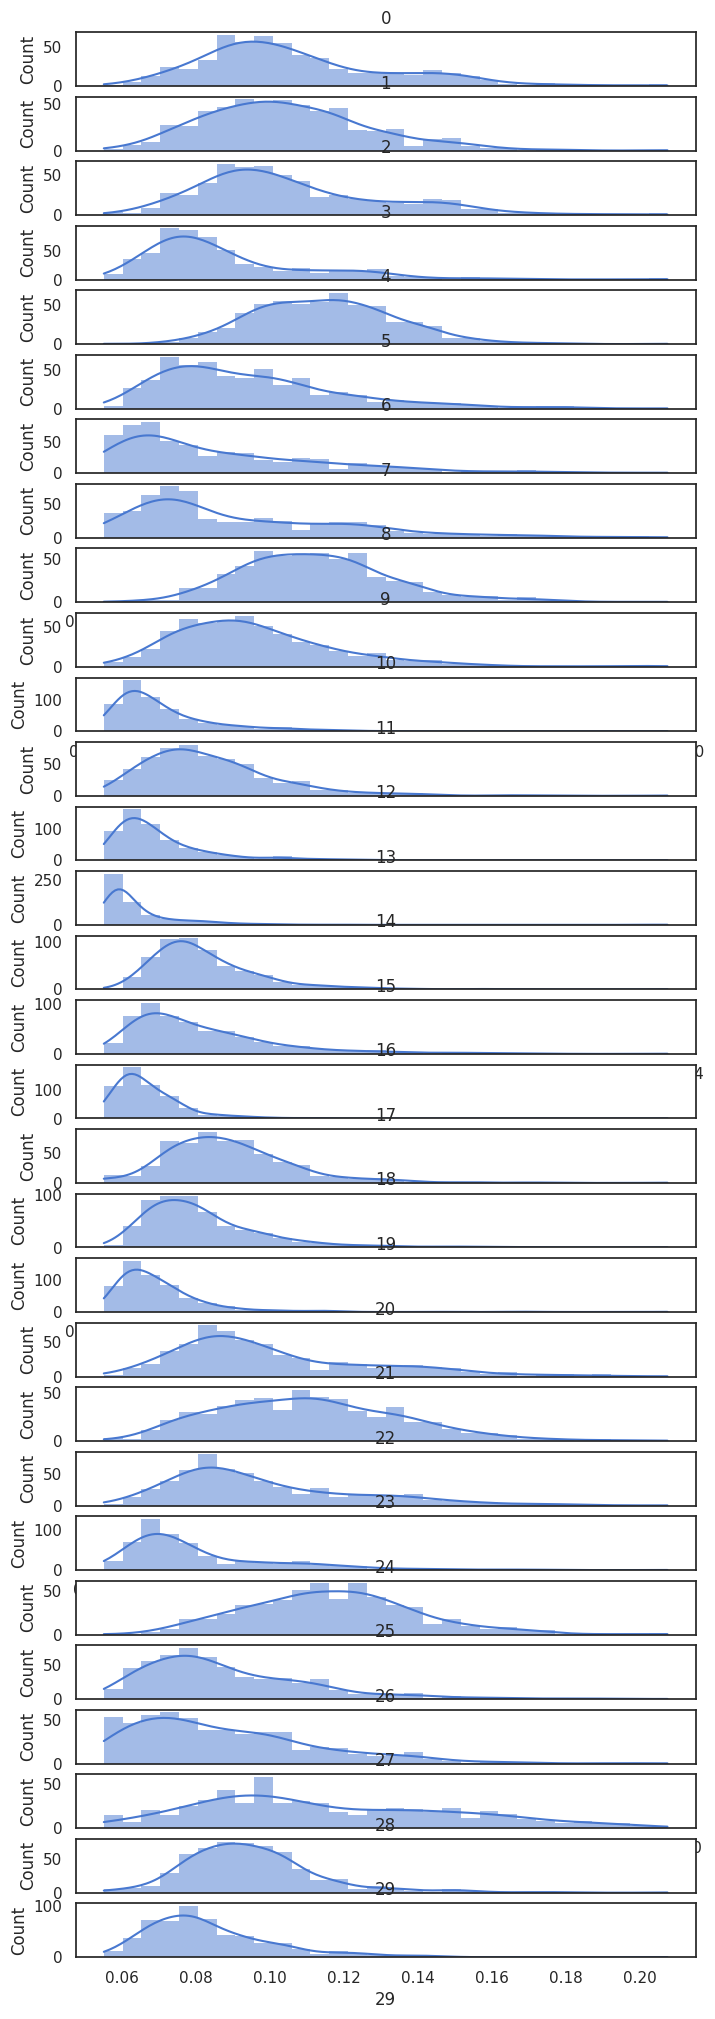

In [46]:
# Este grafico mostra adistribuição nomral de entrada de cada coluna x.

import seaborn as sns
import matplotlib.pyplot as plt

# Definir o estilo do Seaborn
sns.set(style="white", palette="muted", color_codes=True)

# Supondo que 'X' seja o seu DataFrame contendo os dados

# Criar um grid de gráficos de distribuição
fig, axes = plt.subplots(30, figsize=(8, 25))

# Iterar sobre as colunas do DataFrame e plotar os gráficos de distribuição
for i, col in enumerate(X.columns):
    sns.histplot(data=X[col], kde=True, bins=30, ax=axes[i], color='b', edgecolor='none')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


# **Regressão logística (treinado com GD)**
---



In [47]:
taxa_de_aprendizagem = 0.01
interacoes = 1000

In [48]:

# função métrica acurácia
def calcular_acuracia(y_verdadeiro, y_previsto):
    # Calcula o número de previsões corretas
    corretos = np.sum(y_verdadeiro == y_previsto)
    # Calcula o total de previsões
    total = len(y_verdadeiro)
    # Calcula a acurácia
    acuracia = corretos / total
    return acuracia
 #____________________________________________________________________________________________________________________________
def calcular_desvio_padrao(x):
    desvios = np.sqrt(np.mean((x - np.mean(x, axis=0))**2, axis=0))
    return desvios

 #____________________________________________________________________________________________________________________________
def calcular_media(x):
  media = np.mean(x, axis=0)
  return media

#____________________________________________________________________________________________________________________________
# Esta função tem como objetivo de calcular ao desvio padrão e a média de cada classe a partir da acurácia

def desvio_padrao_media_por_classe(scores_treino, scores_teste):

  # Calculando a média das pontuações de validação
  mean_score_treino = calcular_media(scores_treino)
  desvio_score_treino = calcular_desvio_padrao(scores_treino)

  print(f"Acurácia dos 10 folds de treino: ",[f'{score * 100:.2f}%' for score in scores_treino])
  print(f"Média global da Acurácia de validação dos dados de treino: {mean_score_treino * 100:.2f}%")
  print(f"Desvio Padrão global da Acurácia de validação dos dados de treino: {desvio_score_treino * 100:.2f}%")

  print('-'*50)

  mean_score_teste = calcular_media(scores_teste)
  desvio_score_teste = calcular_desvio_padrao(scores_teste)

  print(f"Acurácia dos 10 folds de teste: ",[f'{score * 100:.2f}%' for score in scores_teste])
  print(f"Média global da Acurácia de validação dos dados de teste: {mean_score_teste * 100:.2f}%")
  print(f"Desvio Padrão global da Acurácia de validação dos dados de teste: {desvio_score_teste* 100:.2f}%")

#____________________________________________________________________________________________________________________________
# Esta função tem como obejtivo de de criar um dataframe para mostrar acúraia de cada fold e a média entre elas como também o desvio padrão.

def scores_dataframe(scores_treino,scores_teste):
  # Passando para um DataFrame para poder exibir no gráfico
  dados_scores1 = pd.DataFrame(scores_treino)
  dados_scores2 = pd.DataFrame(scores_teste)

  resultado = pd.concat([dados_scores1 ,dados_scores2 ],axis=1)

  resultado.columns = ['Acuracia de Treino', 'Acuracia de Teste']

  return  (resultado * 100).round(2)

 #____________________________________________________________________________________________________________________________

 # criando uma função gráfico para visualizar os dados em gráfico

def grafico(dados, titulo):

  lista = list(range(1,dados.shape[0]+1))

  fig = px.line(dados,
                x=lista,  # Índice do DataFrame como eixo x
                y=dados.columns,  # Colunas do DataFrame como eixo y
                color_discrete_sequence=px.colors.qualitative.Dark24,  # Sequência de cores
                labels={'x': 'Índice', 'y': 'Valor'},  # Rótulos dos eixos
                title=f'{titulo}')

  # Atualização do layout do gráfico
  fig.update_layout(xaxis_title='Coluna de entrada X',  # Título do eixo x
                    yaxis_title='Valor',  # Título do eixo y
                    legend_title='Fold',  # Título da legenda
                    margin=dict(l=50, r=20, t=50, b=20),  # Define as margens
                    yaxis=dict(showgrid=True, zeroline=False),  # Exibir grade no eixo y
                    width=1300,  # Largura do gráfico
                    height=400)  # Altura do gráfico
  return fig

 #____________________________________________________________________________________________________________________________



In [91]:
# Função do sgmoid para separa classes para 0 e 1
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


# função do gradiente
def gradiente(X, y, taxa_de_aprendizagem, interacoes):
    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(X[:, 0] == 1):
        matriz_x = X
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((X.shape[0], 1)), X))

    Num_linha, Num_coluna = matriz_x.shape

    # Inicializando os parâmetros
    theta_0 = np.zeros(Num_coluna)
    theta_1 = 0

    # Lista para armazenar os valores de perda em cada iteração
    perda = []

    # Gradiente Descendente
    for i in range(interacoes):

        # Calculando o modelo
        modelo = matriz_x.dot(theta_0)

        # Aplicando a função sigmóide para obter as probabilidades
        y_probabilidade = sigmoid(modelo)

        # Calculo do gradiente
        dw = (1 / Num_linha) * matriz_x.T.dot(y_probabilidade - y)
        db = (1 / Num_linha) * (y_probabilidade - y).sum()

        # Atualizando os parâmetros
        theta_0 -= (taxa_de_aprendizagem * dw)
        theta_1 -= (taxa_de_aprendizagem * db)

        # Calculando a função de custo (entropia cruzada binária)
        custo = -(1 / Num_linha) * np.sum((y * np.log(y_probabilidade)) + ((1 - y) * np.log(1 - y_probabilidade)))
        perda.append(custo)

    # Calculando o modelo final
    modelo_final = matriz_x.dot(theta_0)
    # Aplicando a função sigmóide para obter as probabilidades finais
    y_probabilidade_final = sigmoid(modelo_final)

    # Convertendo as probabilidades finais em classes (0 ou 1) usando um limite de decisão de 0.5
    y_previsto = np.where(y_probabilidade_final > 0.5, 1, 0)


    return y_probabilidade_final, y_previsto, theta_0,modelo_final, perda


def prever_regressao_logistica(X_teste, theta_0):

# Calculando o modelo final para os dados de teste
    if np.all(X_teste[:, 0] == 1):
        matriz_x_teste = X_teste
    else:
        # Adicionando a primeira coluna de 1s à matriz de características de teste
        matriz_x_teste = np.hstack((np.ones((X_teste.shape[0], 1)), X_teste))

    # Calculando o modelo final para os dados de teste
    modelo_final_teste = matriz_x_teste.dot(theta_0)

    # Aplicando a função sigmóide para obter as probabilidades finais nos dados de teste
    y_probabilidade_final_teste = sigmoid(modelo_final_teste)

    # Convertendo as probabilidades finais em classes (0 ou 1) usando um limite de decisão de 0.5 para os dados de teste
    y_previsto_teste = np.where(y_probabilidade_final_teste > 0.5, 1, 0)

    return y_probabilidade_final_teste, y_previsto_teste

In [92]:

# Normalizando os dados de treinamento uma vez antes da validação cruzada
scaler = MinMaxScaler()
X_normalizando = scaler.fit_transform(X)

# Definindo a validação cruzada com 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)



# # Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []

salvando_y_previsto_de_cada_fold = []

# Loop sobre os folds
for treino_index, teste_index in kf.split(X_normalizando):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = y[treino_index], y[teste_index]

    # Treinando o modelo com os dados de treinamento
    y_probabilidade_final, y_previsto, coef, modelo_final, perda = gradiente(X_treino, y_treino, taxa_de_aprendizagem, 5000)

    y_probabilidade_final_treino, y_previsto_treino = prever_regressao_logistica(X_treino, coef)
    y_probabilidade_final_teste, y_previsto_teste = prever_regressao_logistica(X_teste, coef)


    salvando_y_previsto_de_cada_fold.append(y_probabilidade_final)

    # Avaliando o modelo
    score = calcular_acuracia(y_treino, y_previsto)
    scores_treino.append(score)

    score_do_teste = calcular_acuracia( y_teste, y_previsto_teste)
    scores_teste.append(score_do_teste)


desvio_padrao_media_por_classe(scores_treino, scores_teste)

Acurácia dos 10 folds de treino:  ['93.55%', '92.77%', '93.75%', '93.36%', '93.16%', '92.97%', '93.55%', '93.16%', '92.58%', '93.76%']
Média global da Acurácia de validação dos dados de treino: 93.26%
Desvio Padrão global da Acurácia de validação dos dados de treino: 0.38%
--------------------------------------------------
Acurácia dos 10 folds de teste:  ['96.49%', '94.74%', '91.23%', '94.74%', '94.74%', '92.98%', '94.74%', '91.23%', '94.74%', '87.50%']
Média global da Acurácia de validação dos dados de teste: 93.31%
Desvio Padrão global da Acurácia de validação dos dados de teste: 2.51%


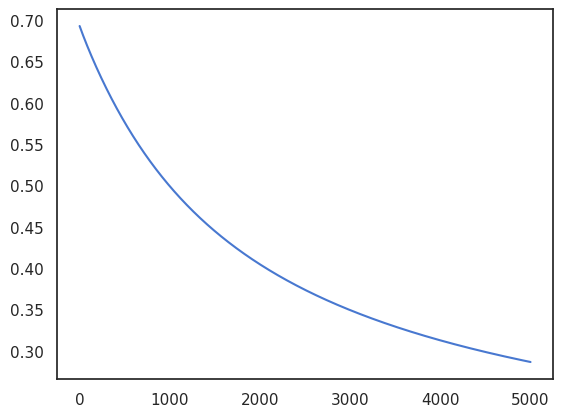

In [51]:
plt.plot(perda,'b')
plt.show()

In [53]:
scores_dataframe(scores_treino,scores_teste)

,Acuracia de Treino,Acuracia de Teste
0,93.55,96.49
1,92.77,94.74
2,93.75,91.23
3,93.36,94.74
4,93.16,94.74
5,92.97,92.98
6,93.55,94.74
7,93.16,91.23
8,92.58,94.74
9,93.76,87.50


In [68]:
#grafico(scores_dataframe(scores_treino,scores_teste), 'Acurácia de treino e teste de cada Folds')

In [81]:
#imports
%pylab inline
from sklearn.datasets import make_classification, load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression #for comparison
#from sklearn.cross_validation import train_test_split

# Função para plotar os contornos e pontos de dados
def plot_contour_scatter(X, y, model, title_text):
    # Criar uma grade de pontos para fazer as previsões
    x1, x2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    Xnew = np.vstack((x1.ravel(), x2.ravel())).T

    # Fazer previsões para os pontos da grade
    y_pred = model.predict(Xnew).reshape(x1.shape)

    # Plotar os contornos
    plt.contourf(x1, x2, y_pred, cmap='Paired', alpha=0.5)

    # Plotar os pontos de dados
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')

    # Adicionar título e rótulos dos eixos
    plt.title(title_text)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Mostrar o gráfico
    plt.show()

Populating the interactive namespace from numpy and matplotlib


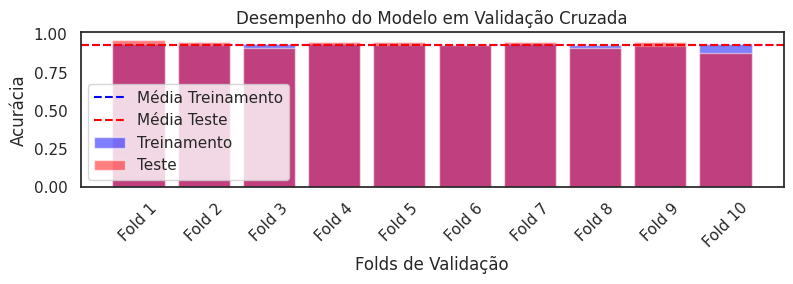

In [55]:
import matplotlib.pyplot as plt

# Definindo os rótulos para os folds
fold_labels = [f"Fold {i+1}" for i in range(len(scores_treino))]

# Plotando as pontuações de validação para os dados de treinamento
plt.figure(figsize=(8, 3))
plt.bar(fold_labels, scores_treino, color='blue', alpha=0.5, label='Treinamento')
plt.axhline(y=calcular_media(scores_treino), color='blue', linestyle='--', label='Média Treinamento')

# Adicionando as pontuações de validação para os dados de teste
plt.bar(fold_labels, scores_teste, color='red', alpha=0.5, label='Teste')
plt.axhline(y=calcular_media(scores_teste), color='red', linestyle='--', label='Média Teste')

plt.xlabel('Folds de Validação')
plt.ylabel('Acurácia')
plt.title('Desempenho do Modelo em Validação Cruzada')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


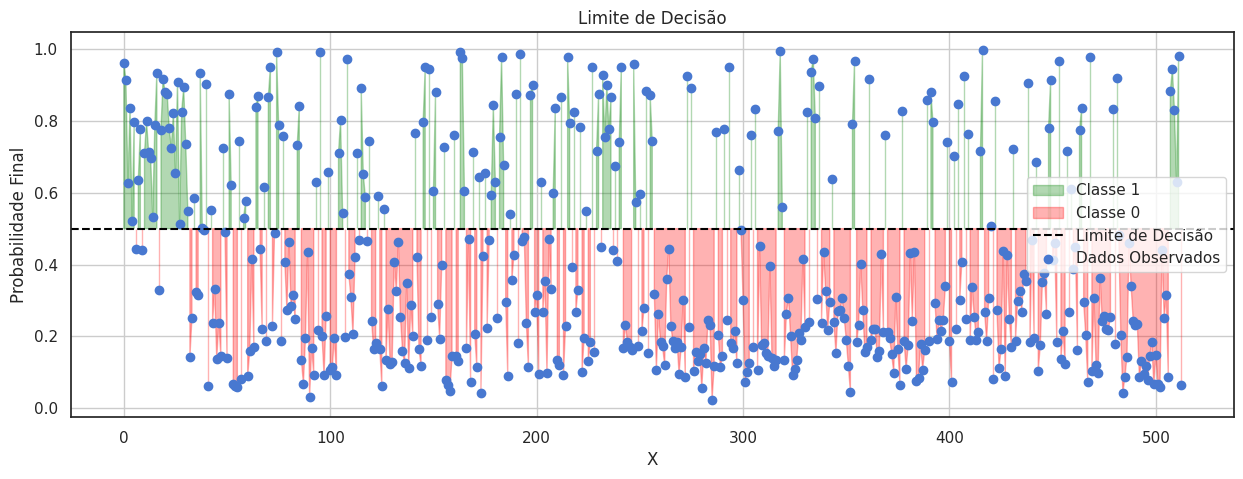

In [56]:
# Definindo o valor y para o limite de decisão
limite_decisao = 0.5

# Criar o gráfico de dispersão
plt.figure(figsize=(15, 5))

# Preencher a área acima do limite de decisão com uma cor
plt.fill_between(np.arange(len(y_probabilidade_final)), y_probabilidade_final, limite_decisao, where=(y_probabilidade_final > limite_decisao), color='green', alpha=0.3, label='Classe 1')

# Preencher a área abaixo do limite de decisão com outra cor
plt.fill_between(np.arange(len(y_probabilidade_final)), y_probabilidade_final, limite_decisao, where=(y_probabilidade_final <= limite_decisao), color='red', alpha=0.3, label='Classe 0')

# Traçar a linha horizontal para o limite de decisão
plt.axhline(y=limite_decisao, color='black', linestyle='--', label='Limite de Decisão')


cores = ['b','g']

# Scatter plot dos dados observados
plt.scatter(np.arange(len(y_probabilidade_final)), y_probabilidade_final,  label='Dados Observados')

# Configurar rótulos, título e legenda
plt.xlabel('X')
plt.ylabel('Probabilidade Final')
plt.title('Limite de Decisão')
plt.legend()
plt.grid(True)
plt.show()



# **Naive Bayes Gaussiano**
---



In [57]:
import numpy as np

def Naive_Bayes_Gaussiano(X_treino ,y_treino):
  classes =np.unique(y_treino)
  media = {}
  variancia = {}
  probabilidade_priore = {}
  desvio_padrao = {}

  total_de_amostra = len(y_treino)

  for classe in classes:

    # Separando os dados de entrada do X_treino de acordo com suas classes
    X_treino_classe = X_treino[y_treino==classe]

    # Calculando a priore pega uma classe soma e dividi pelo o total
    probabilidade_priore[classe] = len(X_treino_classe) / total_de_amostra

    # calculando a media da classe
    media[classe] = np.mean(X_treino_classe, axis=0)

    # calculando a variancia daquela classe
    variancia[classe] = np.var(X_treino_classe,axis=0)

    # calculando o desvio padrão de cada classe
    desvio_padrao[classe] = np.std(X_treino_classe, axis=0)


  return probabilidade_priore, media, variancia, desvio_padrao




def prever_naive_bayes(x_teste, probabilidade_priore, media, variancia):


    previsoes = []
    for x in x_teste:
        # Substituir valores zero por um valor pequeno
        x_sem_zeros = np.where(x == 0, 1e-5, x)

        probabilidades_posteriores = []
        for classe, priore in probabilidade_priore.items():
            prob_priore = np.log(priore)

            eps = 1e-8  # Valor muito pequeno para evitar divisão por zero
            prob_posteriore = np.sum(np.log(calcular_verossimilhanca(x_sem_zeros, media[classe], variancia[classe]) + eps))

            #prob_posteriore = np.sum(np.log(calcular_verossimilhanca(x_sem_zeros, media[classe], variancia[classe])))
            prob_posteriore = prob_priore + prob_posteriore
            probabilidades_posteriores.append(prob_posteriore)
        previsoes.append(list(probabilidade_priore.keys())[np.argmax(probabilidades_posteriores)])
    return previsoes




def calcular_verossimilhanca(x, media, variancia):
    x_sem_zeros = np.where(x == 0, 1e-5, x)
    eps = 1e-8  # Valor muito pequeno para evitar divisão por zero
    verossimilhancas = np.exp(-((x_sem_zeros - media)**2) / (2 * (variancia + eps))) / np.sqrt(2 * np.pi * (variancia + eps))
    return np.prod(verossimilhancas, axis=0)



In [58]:
# # Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []



# Loop sobre os folds
for treino_index, teste_index in kf.split(X_normalizando):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = y[treino_index], y[teste_index]

    # Treinando o modelo com os dados de treinamento e teste

    probabilidade_priore, media_de_cada_classe, variancia_de_cada_classe, desvio_padrao_de_cada_classe = Naive_Bayes_Gaussiano(X_treino,y_treino)

    previsao_treino = prever_naive_bayes(X_treino, probabilidade_priore, media_de_cada_classe, variancia_de_cada_classe)

    previsao_teste = prever_naive_bayes(X_teste, probabilidade_priore, media_de_cada_classe, variancia_de_cada_classe)


    # Avaliando o modelo
    score = calcular_acuracia(y_treino, previsao_treino)
    scores_treino.append(score)

    score_do_teste = calcular_acuracia( y_teste, previsao_teste)
    scores_teste.append(score_do_teste)





desvio_padrao_media_por_classe(scores_treino, scores_teste)

Acurácia dos 10 folds de treino:  ['91.99%', '92.58%', '92.58%', '92.19%', '92.58%', '92.38%', '91.99%', '92.77%', '92.97%', '92.79%']
Média global da Acurácia de validação dos dados de treino: 92.48%
Desvio Padrão global da Acurácia de validação dos dados de treino: 0.32%
--------------------------------------------------
Acurácia dos 10 folds de teste:  ['96.49%', '92.98%', '89.47%', '96.49%', '92.98%', '92.98%', '89.47%', '91.23%', '89.47%', '89.29%']
Média global da Acurácia de validação dos dados de teste: 92.09%
Desvio Padrão global da Acurácia de validação dos dados de teste: 2.65%


In [59]:
scores_dataframe(scores_treino, scores_teste)

,Acuracia de Treino,Acuracia de Teste
0,91.99,96.49
1,92.58,92.98
2,92.58,89.47
3,92.19,96.49
4,92.58,92.98
5,92.38,92.98
6,91.99,89.47
7,92.77,91.23
8,92.97,89.47
9,92.79,89.29


In [60]:
grafico(scores_dataframe(scores_treino, scores_teste), 'Acurácia de treino e teste de cada Folds do modelo Naive Bayes Gaussiano')


#**Análise do discriminante Gaussiano**
---



In [61]:
import numpy as np

def analise_discriminante_gaussiano(X_treino, y_treino):
    # Separar as classes
    classes = np.unique(y_treino)

    # Calcular médias e covariâncias para cada classe
    desvio_padrao = []
    media = []
    covariancia = []
    priore = []
    for c in classes:
        X_c = X_treino[y_treino == c]
        media.append(np.mean(X_c, axis=0))
        covariancia.append(np.cov(X_c.T))
        priore.append(len(X_c) / len(X_treino))
        desvio_padrao.append(np.std(X_c, axis=0))

    return media, covariancia, priore, classes, desvio_padrao

def previsoes(X_teste, media, covariancia, priore, classes):
    # Calcular as probabilidades posteriores para cada classe
    posteriores = []
    for i, c in enumerate(classes):
        prior = priore[i]
        mean = media[i]
        cov = covariancia[i]
        # Usando a fórmula da densidade de probabilidade gaussiana multivariada
        exponent = -0.5 * np.sum((X_teste - mean) @ np.linalg.inv(cov) * (X_teste - mean), axis=1)
        posterior = prior * np.exp(exponent) / np.sqrt(np.linalg.det(2 * np.pi * cov))
        posteriores.append(posterior)

    # Predizer a classe com a maior probabilidade posterior
    return classes[np.argmax(posteriores, axis=0)]






In [62]:
# # Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []



# Loop sobre os folds
for treino_index, teste_index in kf.split(X_normalizando):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = y[treino_index], y[teste_index]

    # Treinando o modelo com os dados de treinamento e teste

    media, covariancia, priore, classes, desvio_padrao = analise_discriminante_gaussiano(X_treino, y_treino)
    previsao_treino = previsoes(X_treino, media, covariancia, priore, classes)
    previsao_teste = previsoes(X_teste, media, covariancia, priore, classes)


    # Avaliando o modelo
    score = calcular_acuracia(y_treino, previsao_treino)
    scores_treino.append(score)

    score_do_teste = calcular_acuracia( y_teste, previsao_teste)
    scores_teste.append(score_do_teste)



desvio_padrao_media_por_classe(scores_treino, scores_teste)

Acurácia dos 10 folds de treino:  ['97.46%', '97.66%', '97.07%', '97.27%', '97.46%', '97.27%', '96.68%', '97.27%', '97.07%', '97.86%']
Média global da Acurácia de validação dos dados de treino: 97.31%
Desvio Padrão global da Acurácia de validação dos dados de treino: 0.31%
--------------------------------------------------
Acurácia dos 10 folds de teste:  ['94.74%', '96.49%', '98.25%', '96.49%', '94.74%', '96.49%', '98.25%', '94.74%', '94.74%', '91.07%']
Média global da Acurácia de validação dos dados de teste: 95.60%
Desvio Padrão global da Acurácia de validação dos dados de teste: 2.00%


In [63]:
classes

array([0., 1.])

In [64]:
scores_dataframe(scores_treino,scores_teste)

,Acuracia de Treino,Acuracia de Teste
0,97.46,94.74
1,97.66,96.49
2,97.07,98.25
3,97.27,96.49
4,97.46,94.74
5,97.27,96.49
6,96.68,98.25
7,97.27,94.74
8,97.07,94.74
9,97.86,91.07


In [65]:
grafico(scores_dataframe(scores_treino,scores_teste), 'Acurácia de treino e teste de cada Folds do modelo Discriminante Gaussiano')


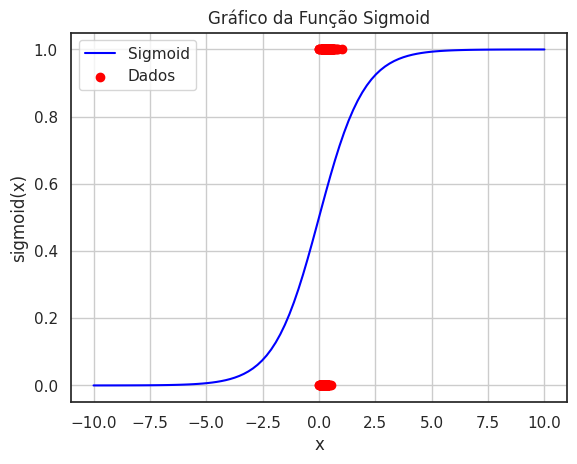

In [67]:
import numpy as np
import matplotlib.pyplot as plt


# Criando um intervalo de valores para x
x_values = np.linspace(-10, 10, 100)

# Calculando os valores correspondentes da função sigmoid para os valores de x
y_values = sigmoid(x_values)

# Plotando o gráfico da função sigmoid
plt.plot(x_values, y_values, label='Sigmoid', color='blue')
plt.scatter(X_treino[:,-2], y_treino, color='red', label='Dados')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Gráfico da Função Sigmoid')
plt.grid(True)
# Ajustando os limites dos eixos x e y
# plt.xlim(-0.5, 0.5)

# plt.ylim(0, 1)
plt.legend()
plt.show()
